In [12]:
%reset -f
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [13]:
import sys
sys.path.append('../')

In [24]:
import os
import numpy as np
import scipy.io as sio
import pickle
from cyclingrnn.train import train_rnn
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# Set the color map: RdBu is nice. Let's take the first and last two colors of ('RdBu',5)
cmap = sns.color_palette('RdBu',5)[:2] + sns.color_palette('RdBu',5)[-2:]
sns.set_palette(cmap)
sns.set_context('paper', font_scale=1.5)

In [16]:
import random

In [99]:
CUR_SIM = 1

In [116]:
cur_params = {}
cur_params['monkey']        = 'D'
cur_params['beta1']         = 10**np.random.uniform(-3, -2)
cur_params['beta2']         = 10**np.random.uniform(-3, -2)
cur_params['activation']    = random.choice(['tanh'])
cur_params['stddev_state']  = 10**np.random.uniform(-3, -3)
cur_params['stddev_out']    = 0.
cur_params['num_neurons']   = 100
cur_params['rnn_init']      = random.choice(['xavier'])
cur_params['learning_rate'] = 10**np.random.uniform(-3, -3)

# fixed parameters
#LEARNING_RATE = 0.0003
NUM_ITERS = 5000
LOAD_PREV = False

# current run and paths

CUR_RUN = "170222testNotebook2"

print CUR_SIM

NPSAVE_PATH = '../saves/'+CUR_RUN+'/npsaves/'
TFSAVE_PATH = '../saves/'+CUR_RUN+'/tfsaves/'
MLSAVE_PATH = '../saves/'+CUR_RUN+'/mlsaves/'
TB_PATH = '../saves/'+CUR_RUN+'/tb/'

def make_dir(path):
  """like os.makedirs(path) but avoids race conditions"""
  try:
    os.makedirs(path)
  except OSError:
    if not os.path.isdir(path):
      raise

make_dir(NPSAVE_PATH)
make_dir(TFSAVE_PATH)
make_dir(MLSAVE_PATH)
make_dir(TB_PATH)

print 'Current Run: '+CUR_RUN

# save params
pickle.dump(cur_params, open(NPSAVE_PATH+str(CUR_SIM)+'params.pickle', 'wb'))

print cur_params


2
Current Run: 170222testNotebook2
{'beta1': 0.0027523195449977614, 'monkey': 'D', 'num_neurons': 100, 'stddev_out': 0.0, 'activation': 'tanh', 'rnn_init': 'xavier', 'beta2': 0.003073604965565434, 'stddev_state': 0.001, 'learning_rate': 0.001}


In [117]:
TB_PATH

'../saves/170222testNotebook2/tb/'

In [118]:
Y_TF, X_TF = train_rnn(monkey=cur_params['monkey'],
                       beta1=cur_params['beta1'],
                       beta2=cur_params['beta2'],
                       stddev_state=cur_params['stddev_state'],
                       stddev_out=cur_params['stddev_out'],
                       activation=cur_params['activation'],
                       rnn_init=cur_params['rnn_init'],
                       num_neurons=cur_params['num_neurons'],
                       learning_rate=cur_params['learning_rate'],
                       num_iters=NUM_ITERS,
                       save_model_path=TFSAVE_PATH+str(CUR_SIM),
                       tb_path=TB_PATH+str(CUR_SIM))

np.save(NPSAVE_PATH+str(CUR_SIM)+'y', Y_TF)
np.save(NPSAVE_PATH+str(CUR_SIM)+'x', X_TF)
sio.savemat(MLSAVE_PATH+str(CUR_SIM)+'.mat', mdict={'X': X_TF, 'Y': Y_TF, 'params': cur_params})
CUR_SIM += 1

  iter: 0000   Loss: 6.304844
  iter: 1000   Loss: 0.507988
  iter: 2000   Loss: 0.963582
  iter: 3000   Loss: 0.083184
  iter: 4000   Loss: 0.061835
  iter: 5000   Loss: 0.046941
  Finished


In [119]:
data = sio.loadmat('../drakeFeb_processed.mat')

In [120]:
y = data['EMG']

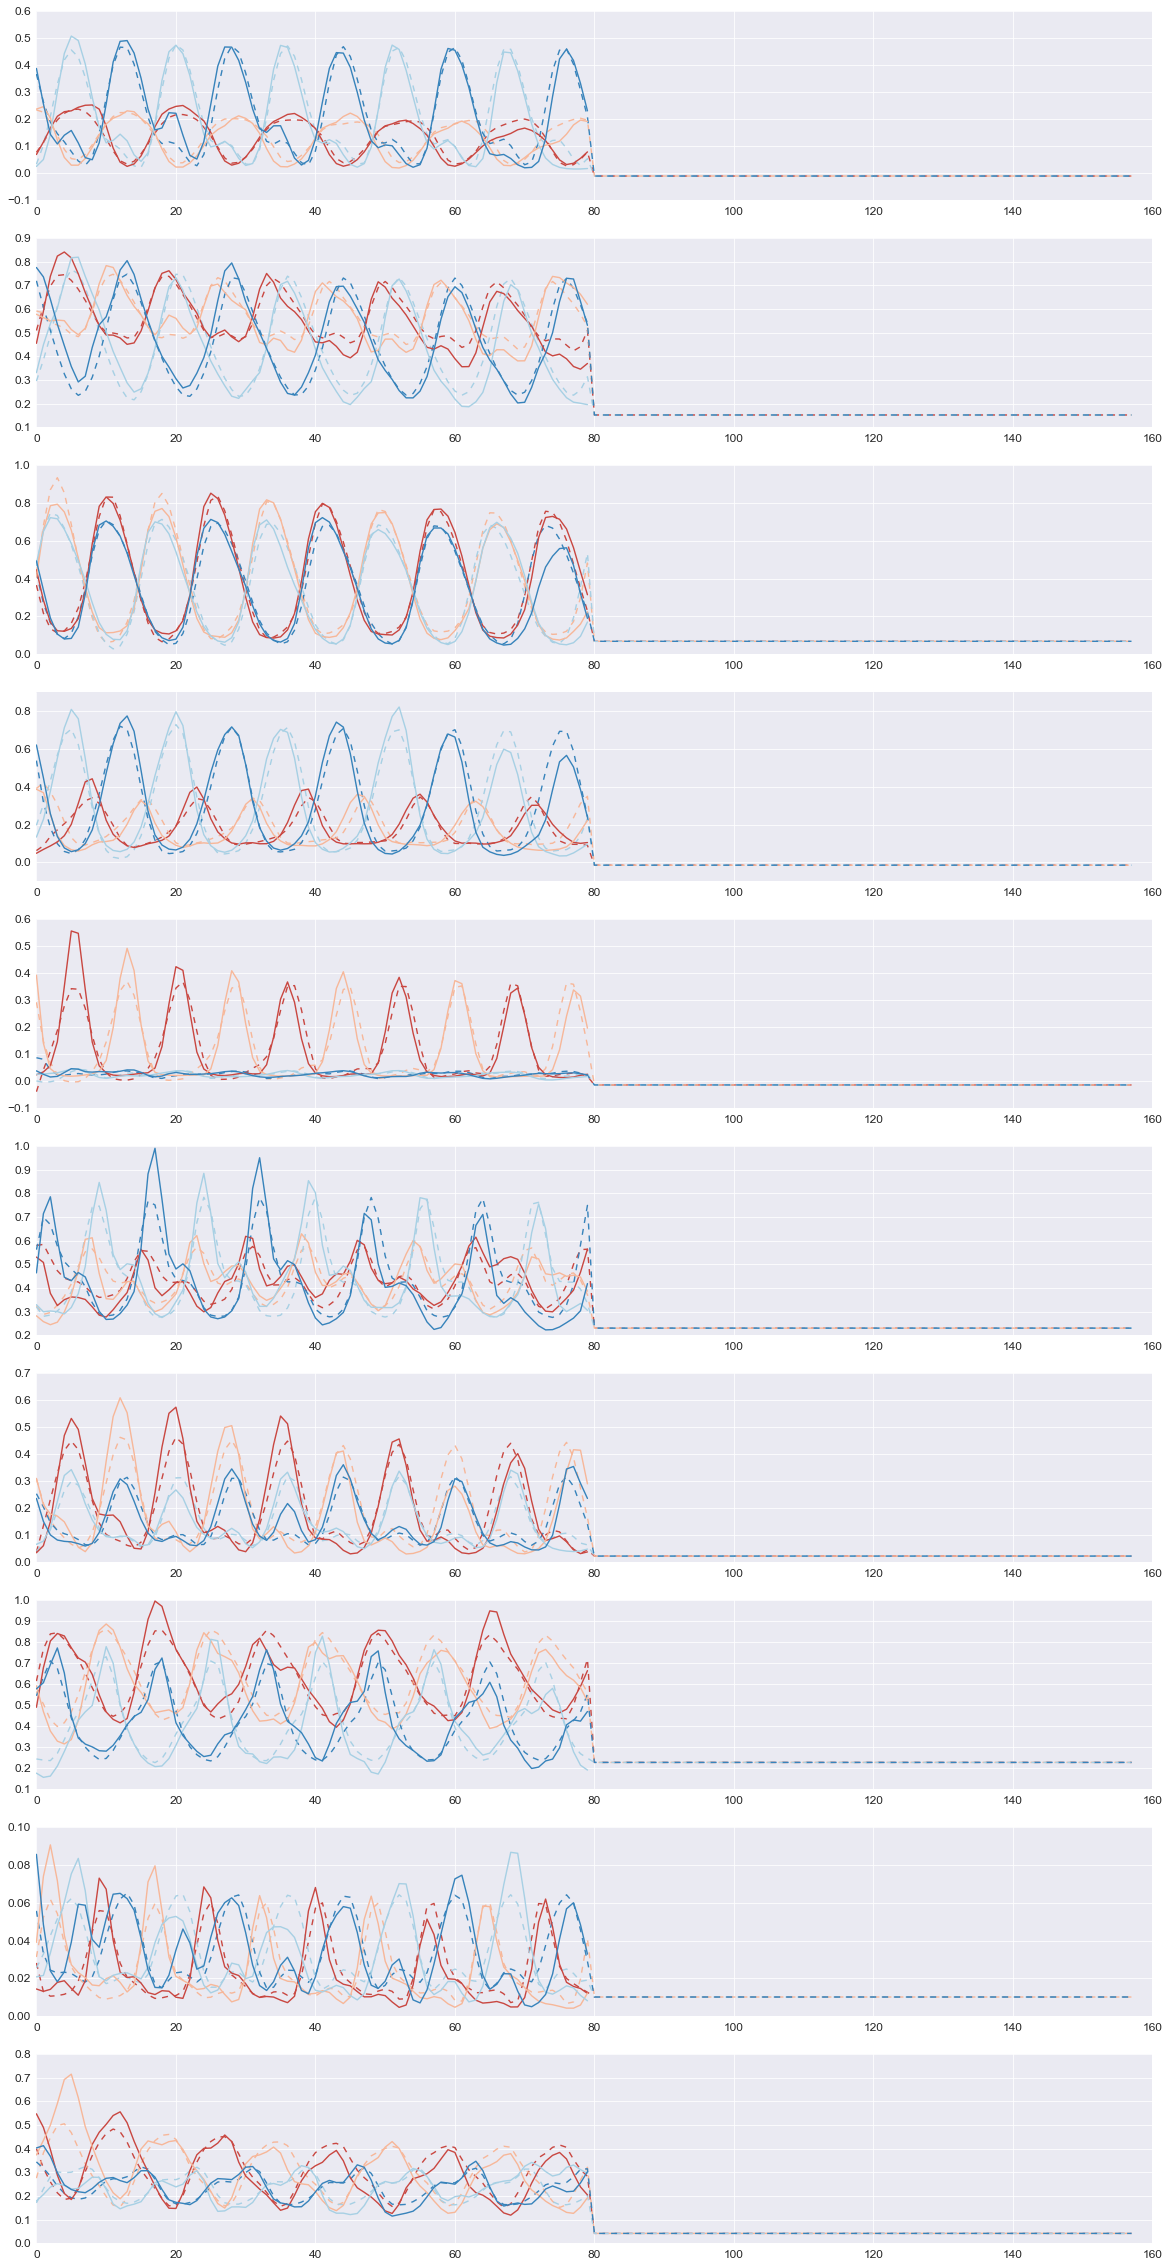

In [121]:
f, ax = plt.subplots(10, 1, figsize=(20,40))
for i in range(10):
  ax[i].plot(Y_TF[:, :4, i], '--')
  ax[i].plot(y[:, :4, i])


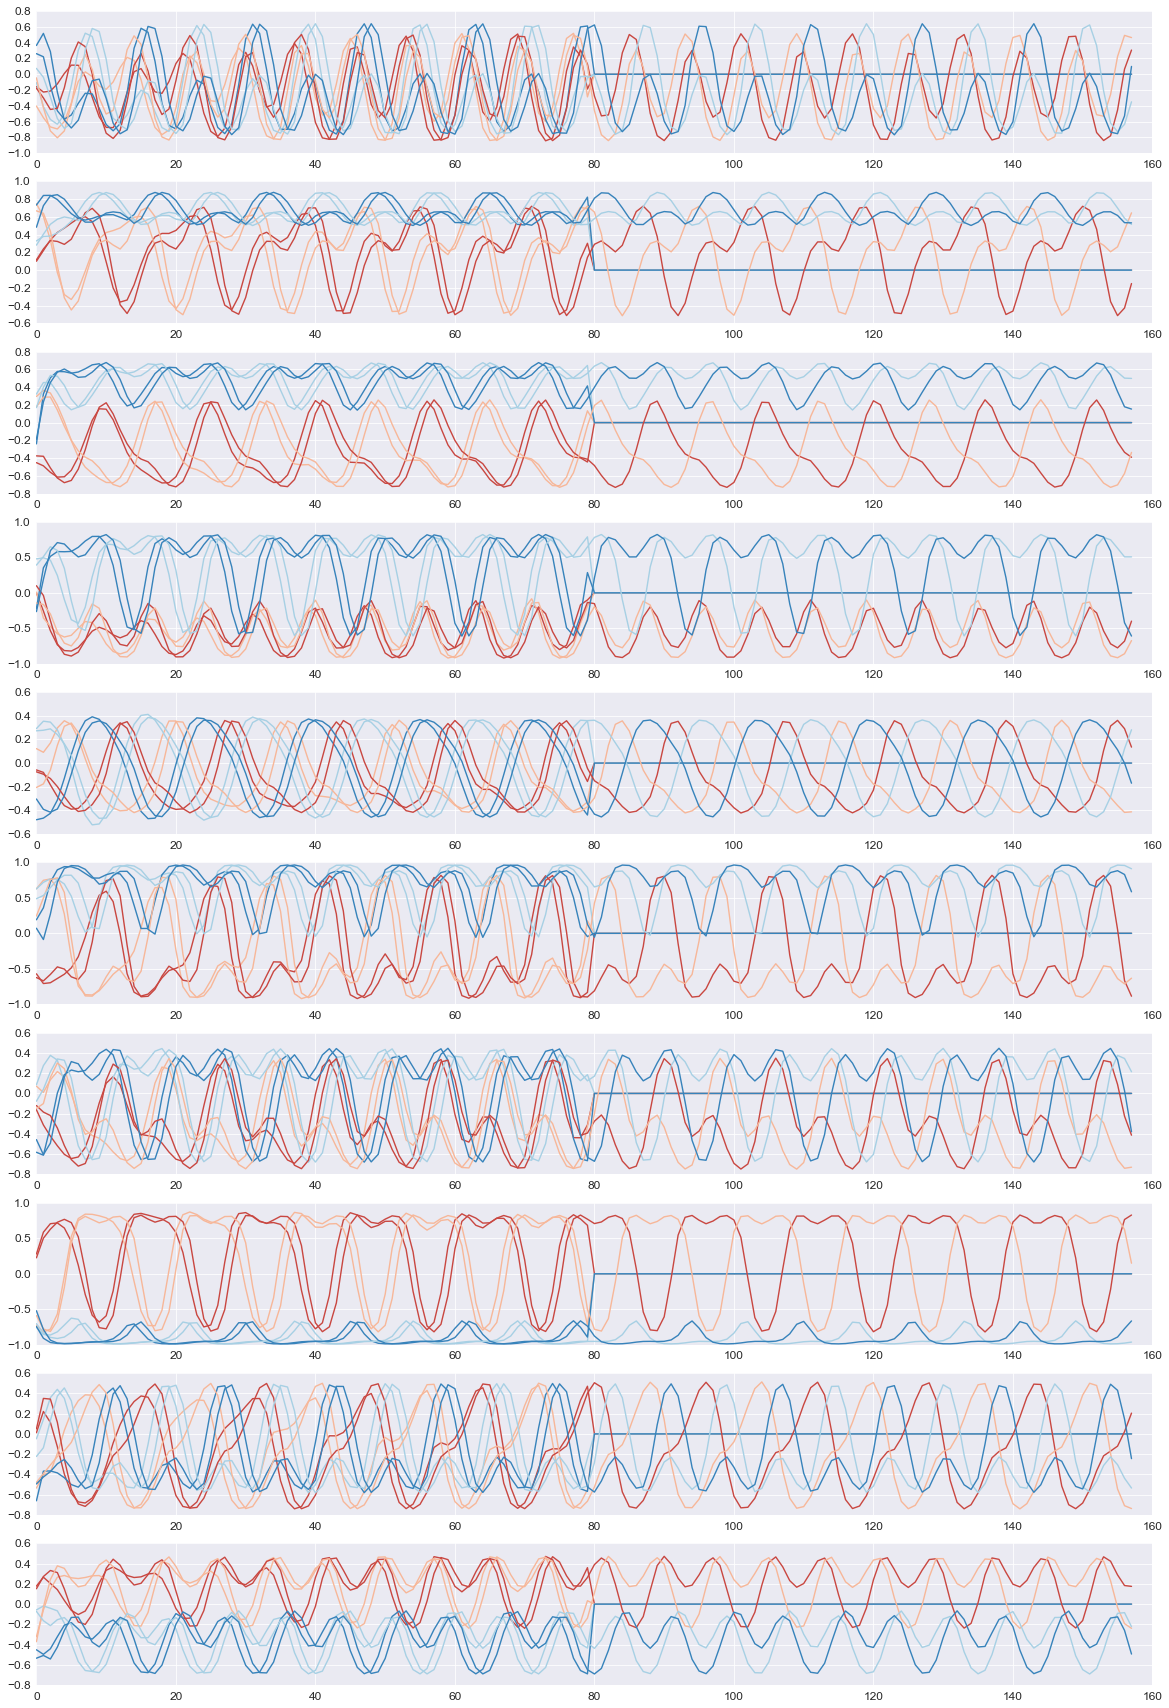

In [122]:
f, ax = plt.subplots(10, 1, figsize=(20,30))
for i in range(10):
  ax[i].plot(X_TF[:, :8, i])